<a href="https://colab.research.google.com/github/zhihong1224/CNN_Demo/blob/master/Lesson6_pets_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
bs=64
path=untar_data(URLs.PETS)/'images'

In [0]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,max_lighting=0.4,
          max_warp=0.4,p_affine=1.,p_lighting=1.)

In [4]:
doc(get_transforms)

In [0]:
src=ImageList.from_folder(path).split_by_rand_pct(0.2,seed=2)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

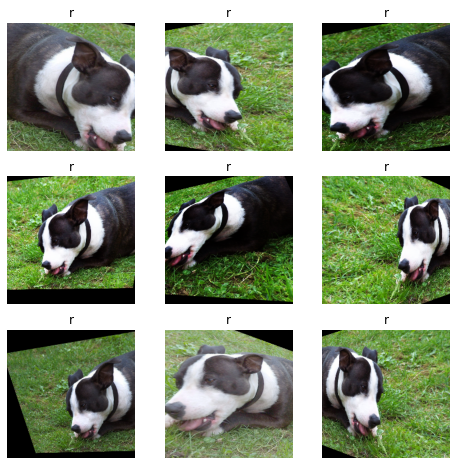

In [6]:
def get_data(size,bs,padding_mode='reflection'):
  return (src.label_from_re(r'([^/])_\d+.jpg$')
       .transform(tfms,size=size,padding_mode=padding_mode)
       .databunch(bs=bs).normalize(imagenet_stats))
data=get_data(224,bs,'zeros')
def _plot(i,j,ax):
  x,y=data.train_ds[3]
  x.show(ax,y=y)
plot_multi(_plot,3,3,figsize=(8,8))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


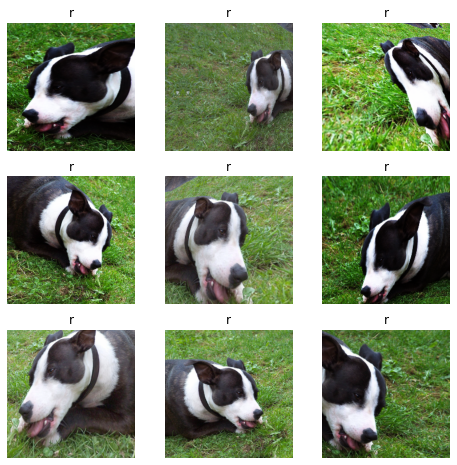

In [7]:
data=get_data(224,bs)
plot_multi(_plot,3,3,figsize=(8,8))

In [8]:
# train a model
gc.collect()
learn=cnn_learner(data,models.resnet18,metrics=error_rate,bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
learn.fit_one_cycle(3,slice(1e-2),pct_start=0.8)

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-3),pct_start=0.8)

In [0]:
data=get_data(352,bs)
learn.data=data

In [0]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('352')

In [0]:
# 卷积核
data=get_data(352,16)
learn=cnn_learner(data,models.resnet18,metrics=error_rate,bn_final=True).load('352')

Category 1

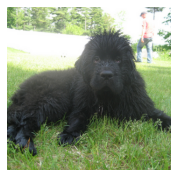

In [45]:
idx=40
x,y=data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [46]:
k=tensor([
  [0.,-5/3,1],
  [-5/3,-5/3,1],
  [1.,1,1]
]).expand(1,3,3,3)/6
print(k,k.shape)

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]]) torch.Size([1, 3, 3, 3])


In [63]:
t=data.valid_ds[idx][0].data;t.shape

torch.Size([3, 352, 352])

In [64]:
t[None].shape

torch.Size([1, 3, 352, 352])

In [0]:
edge=F.conv2d(t[None],k)

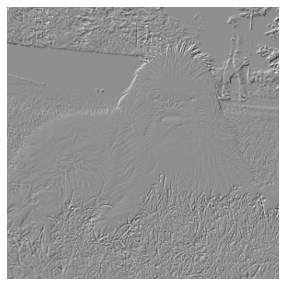

In [66]:
show_image(edge[0],figsize=(5,5))

In [51]:
data.c

11

In [52]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [53]:
print(learn.summary)

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
r,l,n,r,e
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
d,e,r,d,e
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d

In [0]:
# Heatmap 热力图
m=learn.model.eval()

In [0]:
xb,_=data.one_item(x)
xb_im=Image(data.denorm(xb)[0])
xb=xb.cuda()

In [0]:
from fastai.callbacks.hooks import *

In [0]:
def hooked_backward(cat=y):
  with hook_output(m[0]) as hook_a:
    with hook_output(m[0],grad=True) as hook_g:
      preds=m(xb)
      preds[0,int(cat)].backward()
  return hook_a,hook_g

In [0]:
hook_a,hook_g=hooked_backward()

In [59]:
acts=hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [60]:
avg_acts=acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [0]:
def show_heatmap(hm):
  _,ax=plt.subplots()
  xb_im.show(ax)
  ax.imshow(hm,alpha=0.6,extent=(0,352,352,0),interpolation='bilinear',cmap='magma')

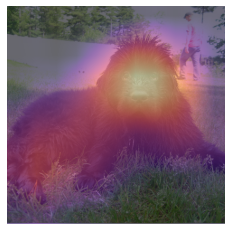

In [62]:
show_heatmap(avg_acts)